#Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts, GridSearchCV as gsc, cross_val_score as cvs
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import accuracy_score as acc, mean_squared_error as mse, r2_score as r2, classification_report as cr, confusion_matrix as cm

#Converting the CSV data into a Pandas DataFrame

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

#Data Splitting and Model Training

In [ ]:
X = df[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am',
        'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
        'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
        'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21',
        'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
        'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']]
y = df['Cover_Type']

In [ ]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}
grid_search = gsc(estimator = rfc(random_state = 42), param_grid = param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

model = rfc(**best_params, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Checking Model Accuracy

In [ ]:
print('Accuracy Score:', round(acc(y_test, y_pred), 2))
print('Average Cross-Validation Score:', round(cvs(model, X, y, cv = 5).mean(), 2))
print('Mean Squared Error:', round(mse(y_test, y_pred), 2))
print('Root Mean Squared Error:', round(np.sqrt(mse(y_test, y_pred)), 2))
print('R2 Score:', round(r2(y_test, y_pred), 2))
print('Best Hyperparameters:', best_params)

print('\nClassification Report:\n', cr(y_test, y_pred))
print('\nConfusion Matrix:\n', cm(y_test, y_pred))

Accuracy Score: 0.87
Average Cross-Validation Score: 0.79
Mean Squared Error: 0.94
Root Mean Squared Error: 0.97
R2 Score: 0.76
Best Hyperparameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.78      0.78       421
           2       0.82      0.71      0.76       438
           3       0.84      0.84      0.84       428
           4       0.93      0.98      0.96       449
           5       0.89      0.96      0.93       416
           6       0.86      0.86      0.86       432
           7       0.95      0.98      0.97       440

    accuracy                           0.87      3024
   macro avg       0.87      0.87      0.87      3024
weighted avg       0.87      0.87      0.87      3024


Confusion Matrix:
 [[327  61   0   0  13   0  20]
 [ 77 309  17   0  28   6   1]
 [  0   0 358  17   3  50   0]
 [  0   0   4 441   0   4   0]
 [  0   5   9   0 399

#Plotting Accuracy of the Model

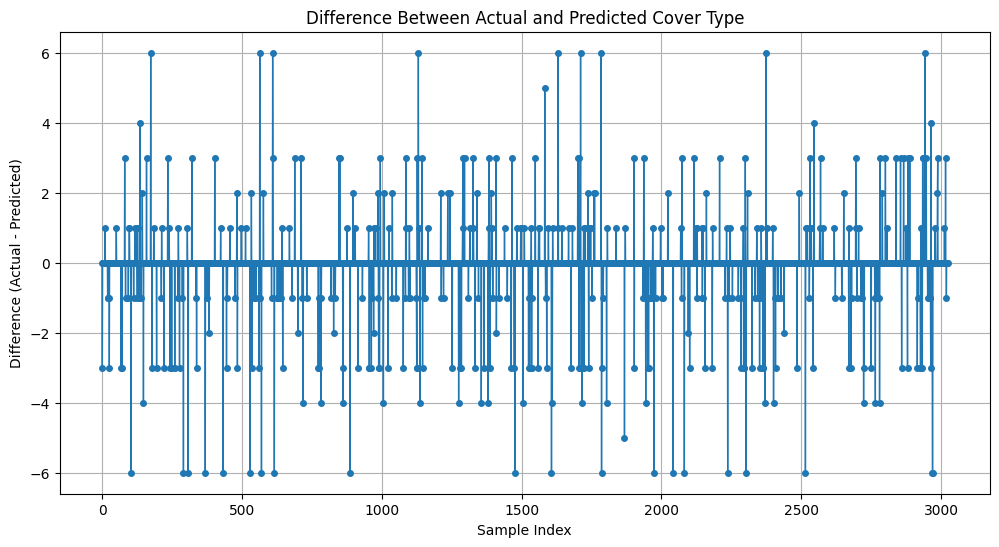

In [ ]:
difference = y_test.values - y_pred

plt.figure(figsize=(12, 6))
plt.plot(range(len(difference)), difference, marker='o', linestyle='-', linewidth=1, markersize=4)
plt.xlabel('Sample Index')
plt.ylabel('Difference (Actual - Predicted)')
plt.title('Difference Between Actual and Predicted Cover Type')
plt.grid(True)
plt.show()

#Testing Model against User Input

In [ ]:
def pred_type(data):
  features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am',
              'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
              'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
              'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21',
              'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
              'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']
  input_data = pd.DataFrame([data], columns = features)
  prediction = model.predict(input_data)[0]

  forest_cover_types = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
  cover_type = forest_cover_types[prediction - 1]

  return prediction, cover_type

pred_cover, cover_type = pred_type(
    list(map(int,input('Enter the 54 values corresponding to the required respective fields for making an evaluation separated by space:\n').split())))
print(f'Predicted cover type: {cover_type} (type {pred_cover})')

Enter the 54 values corresponding to the required respective fields for making an evaluation separated by space:
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
Predicted cover type: Douglas-fir (type 6)
